<a href="https://colab.research.google.com/github/DhanuMW/Data_Science_Projects/blob/main/Customer_Segmentation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Customer Segmentation Project - Deep Learning Experiment

In this assignment a deep learning experiment is designed for a multi class classification dataset called customer segmentation in which has a slight imbalance in class distribution.

The dataset is preprocessed to match the requirements of deep learning algorithms.

In [ ]:
# Import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
# Mount google drive to upload the dataset
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [ ]:
train = train.drop(['ID'], axis=1)
train = train.drop(['Segmentation'], axis=1)
test = test.drop(['ID'], axis=1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 567.4+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           2627 non-null   object 
 1   Ever_Married     2577 non-null   object 
 2   Age              2627 non-null   int64  
 3   Graduated        2603 non-null   object 
 4   Profession       2589 non-null   object 
 5   Work_Experience  2358 non-null   float64
 6   Spending_Score   2627 non-null   object 
 7   Family_Size      2514 non-null   float64
 8   Var_1            2595 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 184.8+ KB


In [ ]:
train.isna().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
dtype: int64

In [ ]:
test.isna().sum()

Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [ ]:
train_missing = train.isnull().any(axis=1).sum()
test_missing = test.isnull().any(axis=1).sum()
print("Missing rows in train data:", train_missing)
print("Missing rows in test data:", test_missing)

Missing rows in train data: 1403
Missing rows in test data: 473


In [ ]:
train['Work_Experience'].fillna(train['Work_Experience'].mean(), inplace=True)
train['Family_Size'].fillna(train['Family_Size'].median(), inplace=True)

In [ ]:
test['Work_Experience'].fillna(test['Work_Experience'].mean(), inplace=True)
test['Family_Size'].fillna(test['Family_Size'].median(), inplace=True)

In [ ]:
train.shape

(8068, 9)

In [ ]:
test.shape

(2627, 9)

In [ ]:
train.dropna(inplace=True)

In [ ]:
test.dropna(inplace=True)

Missing values are handled in several different ways depending on the type of the feature.

In [ ]:
print('Number of unique values:\n{}'.format(train.nunique()))

Number of unique values:
Gender              2
Ever_Married        2
Age                67
Graduated           2
Profession          9
Work_Experience    16
Spending_Score      3
Family_Size         9
Var_1               7
dtype: int64


In [ ]:
print('Unique values in each categorical column:')
for col in train.select_dtypes(include=[object]):
  print(col, ':', train[col].unique())

Unique values in each categorical column:
Gender : ['Male' 'Female']
Ever_Married : ['No' 'Yes']
Graduated : ['No' 'Yes']
Profession : ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing']
Spending_Score : ['Low' 'Average' 'High']
Var_1 : ['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' 'Cat_5']


The label column "Var_1" had 7 classes instead of 2. So the classes will be mapped in order to have 3 classes called Cat_6, Cat_4, and Other. The same will be performed for test set as well.

In [ ]:
mapping = {'Cat_1' : 'Other', 'Cat_2' : 'Other', 'Cat_3' : 'Other', 'Cat_5' : 'Other', 'Cat_7' : 'Other', 'Cat_4' : 'Cat_4', 'Cat_6' : 'Cat_6'}
train['Var_1'] = train['Var_1'].map(mapping)

In [ ]:
value_counts = train['Var_1'].value_counts()
percentages = (value_counts / len(train)) * 100

print("Value Count in 'Var_1' column:")
print(value_counts)
print("Value Count Percentage in 'Var_1' column:")
print(percentages)

Value Count in 'Var_1' column:
Cat_6    5088
Other    1566
Cat_4    1015
Name: Var_1, dtype: int64
Value Count Percentage in 'Var_1' column:
Cat_6    66.345025
Other    20.419872
Cat_4    13.235102
Name: Var_1, dtype: float64


In [ ]:
for col in test.select_dtypes(include=[object]):
  print(col, ':', test[col].unique())

Gender : ['Female' 'Male']
Ever_Married : ['Yes' 'No']
Graduated : ['Yes' 'No']
Profession : ['Engineer' 'Healthcare' 'Executive' 'Marketing' 'Doctor' 'Artist'
 'Lawyer' 'Entertainment' 'Homemaker']
Spending_Score : ['Low' 'Average' 'High']
Var_1 : ['Cat_6' 'Cat_4' 'Cat_3' 'Cat_1' 'Cat_2' 'Cat_5' 'Cat_7']


In [ ]:
mapping = {'Cat_1' : 'Other', 'Cat_2' : 'Other', 'Cat_3' : 'Other', 'Cat_5' : 'Other', 'Cat_7' : 'Other', 'Cat_4' : 'Cat_4', 'Cat_6' : 'Cat_6'}
test['Var_1'] = test['Var_1'].map(mapping)

In [ ]:
train.describe()

,Age,Work_Experience,Family_Size
count,7669.000000,7669.000000,7669.000000
mean,43.508541,2.636749,2.853175
std,16.689330,3.234815,1.498855
min,18.000000,0.000000,1.000000
25%,31.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


In [ ]:
train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4
1,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6
4,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

train_cat = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
train_encode = train[train_cat].copy()
for column in train_encode:
    if column in train_encode.columns:
        train_encode[column] = label_encoder.fit_transform(train_encode[column])

The categorical features are encoded using label encoder from sklearn library.

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_num = ['Age', 'Work_Experience', 'Family_Size']
train_ss = train[train_num]

train_scale = ss.fit_transform(train_ss.values)

#convert the standardized array into a dataframe
train_frame = pd.DataFrame(train_scale, index=train_ss.index, columns=train_ss.columns)

The numerical features are normalized using standard scaler from sklearn library. The encoded categorical features and normalized numerical features are concatenated to create the final training set. The is performed for the test set as well.

In [ ]:
train_new = pd.concat([train_frame, train_encode], axis=1)
train_new.head()

,Age,Work_Experience,Family_Size,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1
0,-1.288844,-0.506012,0.765184,1,0,0,5,2,0
1,-0.330085,0.001519,0.097964,0,1,1,2,0,0
2,1.407665,-0.506012,-1.236474,0,1,1,2,2,1
3,1.407665,-0.815169,-0.569255,1,1,1,7,1,1
4,-0.210240,0.001519,2.099622,0,1,1,3,1,1


In [ ]:
test_cat = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
test_encode = test[test_cat].copy()
for column in test_encode:
    if column in test_encode.columns:
        test_encode[column] = label_encoder.fit_transform(test_encode[column])
test_encode.head

test_num = ['Age', 'Work_Experience', 'Family_Size']
test_ss = test[test_num]

test_scale = ss.fit_transform(test_ss.values)

test_frame = pd.DataFrame(test_scale, index=test_ss.index, columns=test_ss.columns)

test_new = pd.concat([test_frame, test_encode], axis=1)

Now the features and labels are ready to perform deep learning algorithms.

#### Deep Learning Experiment

In [ ]:
from sklearn.model_selection import train_test_split
# 1.1 Shuffling the training data
train_s1 = train_new.sample(frac=1).reset_index(drop=True)

# Seperate features and labels
train_s1_features = train_s1.drop(columns=['Var_1'], axis=1)
train_s1_labels = train_s1['Var_1']

# Splitting into training and validation sets
X_train_s1, X_val_s1, y_train_s1, y_val_s1 = train_test_split(train_s1_features, train_s1_labels, test_size=0.10, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras import metrics
from keras.metrics import categorical_crossentropy
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.model_selection  import train_test_split
import keras.backend as K
from keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback
from keras.metrics import AUC

# Custom f1-score metric function
def f1_score_train(y_true, y_pred):
    y_pred = K.round(y_pred)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))

    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_num = 2 * (precision * recall) / (precision + recall + K.epsilon())

    return f1_num

def customer_segmentation_model(X_train, X_val, y_train, y_val, test):

  y_train = to_categorical(y_train, 3)
  y_val = to_categorical(y_val, 3)

  X_test = test_new.drop(['Var_1'], axis=1)
  y_test = test_new['Var_1']
  y_test = to_categorical(y_test, 3)

  # 1.2 Design neural network model
  def build_model():
    model = Sequential()
    # Input layer
    model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
    # Hidden layers
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    # Output layer
    model.add(Dense(3, activation='softmax'))

    #y_pred = model.predict(X_train)

  # 1.3 Model tuning using validation set and monitor f1-score while applying early stopping
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[f1_score_train, 'accuracy'])
    return model

  # Fit the model
  model = build_model()
  call_back = EarlyStopping(monitor='loss', mode='min', patience=10, restore_best_weights=True)
  history = model.fit(X_train, y_train, epochs=20, batch_size=150, validation_data=(X_val, y_val), shuffle=True, callbacks=[call_back], verbose=1)
  #y_pred = model.predict(y_train)
  #val_f1_score = model.evaluate(X_val, y_val)
  #print('Validation set f1-score:', np.round(val_f1_score, 3))

  # 1.4 Calculate classification metrics using test data
  test_loss, test_accuracy, test_f1_score = model.evaluate(X_test, y_test, verbose=1)

  y_pred = model.predict(X_test)
  y_pred_classes = np.argmax(y_pred, axis=1)
  y_true = np.argmax(y_test, axis=1)

  precision = precision_score(y_true, y_pred_classes, average='weighted')
  recall = recall_score(y_true, y_pred_classes, average='weighted')
  #f1 = f1_score(y_true, y_pred_classes, average='weighted')

  print(f'Test Loss: {test_loss:.4f}')
  print(f'Test Accuracy: {test_accuracy:.4f}')
  print(f'Test Precision: {precision:.4f}')
  print(f'Test Recall: {recall:.4f}')
  print(f'Test F1-score: {test_f1_score:.4f}')
  #confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
  #print('Classification Report')
  #print(classification_report(y_test, y_pred))

  # 1.6 Generate the loss and f1-score curve for training and validation set
  plt.figure(figsize=(10, 4))

  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(history.history['f1_score_train'], label='Training F1-score')
  plt.plot(history.history['val_f1_score_train'], label='Validation F1-score')
  plt.xlabel('Epochs')
  plt.ylabel('F1-score')
  plt.title('Training and Validation F1-score')
  plt.legend()

  plt.tight_layout()
  plt.show()

  # 1.7 Generate the ROC-AUC curve and optimal threshold from the curve

  from itertools import cycle
  from sklearn.preprocessing import label_binarize

  y_test = label_binarize(y_test, classes=[0, 1, 2])

  def predict_proba(number):
    return [number[0],1-number[0]]

    y_prob = np.array(list(map(predict_proba, model_cEXT.predict(X_test))))
    y_prob

  #model.predict(X_test)
  #model.y_prob(X_test)

  y_pred_prob = model.predict(X_test)

  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  for i in range(y_test.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

  plt.figure(figsize=(8, 6))

  #fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, multi_class='ovr')

  colors = cycle(['blue', 'red', 'green'])  # Use different colors for different classes
  for i, color in zip(range(y_test.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

  plt.plot([0, 1], [0, 1], color='black', linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class Classification')
  plt.legend(loc='lower right')
  plt.show()

  from sklearn.metrics import f1_score

  optimal_thresholds = []

  class_index = 0  # Replace with the desired class index

  threshold = 0.5  # Set your desired threshold value

  # Getting predicted probabilities for a specific class
  class_probs = y_pred_prob[:, class_index]

  best_threshold = 0
  best_metric = 0

  for threshold in np.linspace(0.1, 0.9, num=3):


  # Converting probabilities to class predictions based on the threshold
    class_predictions = (class_probs >= threshold).astype(int)

    f1 = f1_score(y_test[:, class_index], class_predictions)

          # Check if current F1-score is better than the previous best
    if f1 > best_metric:
              best_metric = f1
              best_threshold = threshold

      # Store the optimal threshold for the current class
    optimal_thresholds.append(best_threshold)

    print("Optimal Thresholds for Each Class:", optimal_thresholds)


Epoch 1/20
47/47 [==============================] - 3s 12ms/step - loss: 0.8838 - f1_score_train: 0.5369 - accuracy: 0.6437 - val_loss: 0.8128 - val_f1_score_train: 0.6627 - val_accuracy: 0.6714
Epoch 2/20
47/47 [==============================] - 0s 5ms/step - loss: 0.8149 - f1_score_train: 0.6317 - accuracy: 0.6659 - val_loss: 0.8077 - val_f1_score_train: 0.6534 - val_accuracy: 0.6728
Epoch 3/20
47/47 [==============================] - 0s 5ms/step - loss: 0.8104 - f1_score_train: 0.6268 - accuracy: 0.6688 - val_loss: 0.8016 - val_f1_score_train: 0.6850 - val_accuracy: 0.6754
Epoch 4/20
47/47 [==============================] - 0s 5ms/step - loss: 0.8080 - f1_score_train: 0.6589 - accuracy: 0.6708 - val_loss: 0.8088 - val_f1_score_train: 0.6659 - val_accuracy: 0.6754
Epoch 5/20
47/47 [==============================] - 0s 5ms/step - loss: 0.8084 - f1_score_train: 0.6480 - accuracy: 0.6715 - val_loss: 0.8060 - val_f1_score_train: 0.6794 - val_accuracy: 0.6714
Epoch 6/20
47/47 [===========

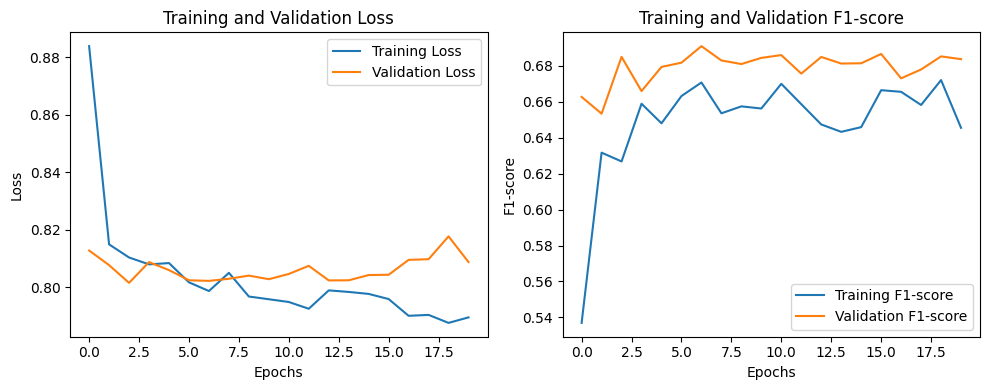

78/78 [==============================] - 0s 2ms/step


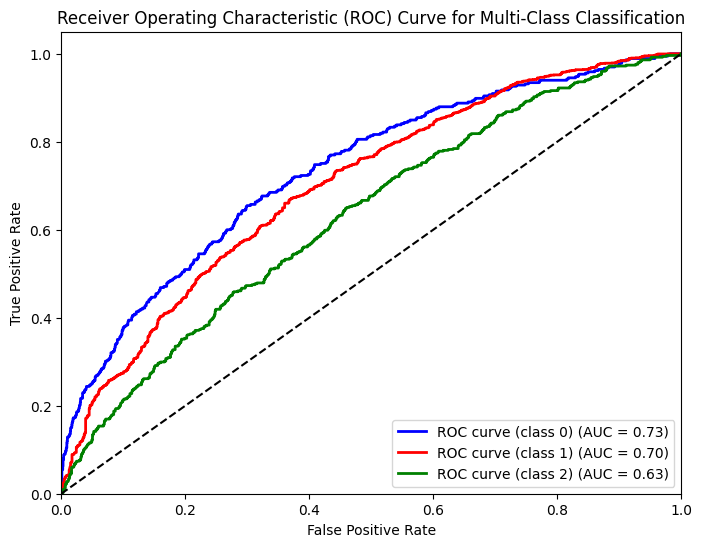

Optimal Thresholds for Each Class: [0.1]
Optimal Thresholds for Each Class: [0.1, 0.1]
Optimal Thresholds for Each Class: [0.1, 0.1, 0.1]


In [ ]:
customer_segmentation_model(X_train_s1, X_val_s1, y_train_s1, y_val_s1, test_new)

1.5 Significance of classification metrics in a multi class classification problem.

The accuracy is straightforward but it alone doesn't provide a better explanation to how well the model performs. Hence considering precision, recall, and f1-score are equally important.

In a multiclass classification, accuracy is calculated similarly as in a binary classification. But other metrics are calculated differently. The precision and recall are calculated individually for each class or else by averaging across all classes.

And since f1-score is calculated by using both precision and recall it can be considered as most important in telling how well the model is performing.

1.7 Model classification metrics are as follows.
Test Loss: 0.8111
Test Accuracy: 0.6585
Test Precision: 0.6199
Test Recall: 0.6672
Test F1-score: 0.6672

The model accuracy is low for this problem with an average around 65%. The model hyperparameters were tuned to obtain better performance but still around 60%-70% was the highest even in the f1-score. Hence it can be assumed that the reason could be the class imbalance in the dataset.

#### Deep Learning Experiment With Over Sampling

1.8 The model training performed again with sampling in the training set with the purpose to overcome the class imbalance issue.

Epoch 1/20
92/92 [==============================] - 2s 8ms/step - loss: 1.0288 - f1_score_train: 0.2294 - accuracy: 0.4666 - val_loss: 1.0166 - val_f1_score_train: 0.2814 - val_accuracy: 0.4637
Epoch 2/20
92/92 [==============================] - 0s 5ms/step - loss: 0.9938 - f1_score_train: 0.3081 - accuracy: 0.4915 - val_loss: 1.0060 - val_f1_score_train: 0.2925 - val_accuracy: 0.4807
Epoch 3/20
92/92 [==============================] - 0s 5ms/step - loss: 0.9810 - f1_score_train: 0.3320 - accuracy: 0.5086 - val_loss: 0.9927 - val_f1_score_train: 0.3417 - val_accuracy: 0.4846
Epoch 4/20
92/92 [==============================] - 0s 5ms/step - loss: 0.9729 - f1_score_train: 0.3433 - accuracy: 0.5150 - val_loss: 0.9786 - val_f1_score_train: 0.3311 - val_accuracy: 0.5075
Epoch 5/20
92/92 [==============================] - 0s 5ms/step - loss: 0.9618 - f1_score_train: 0.3721 - accuracy: 0.5197 - val_loss: 0.9749 - val_f1_score_train: 0.3836 - val_accuracy: 0.5043
Epoch 6/20
92/92 [============

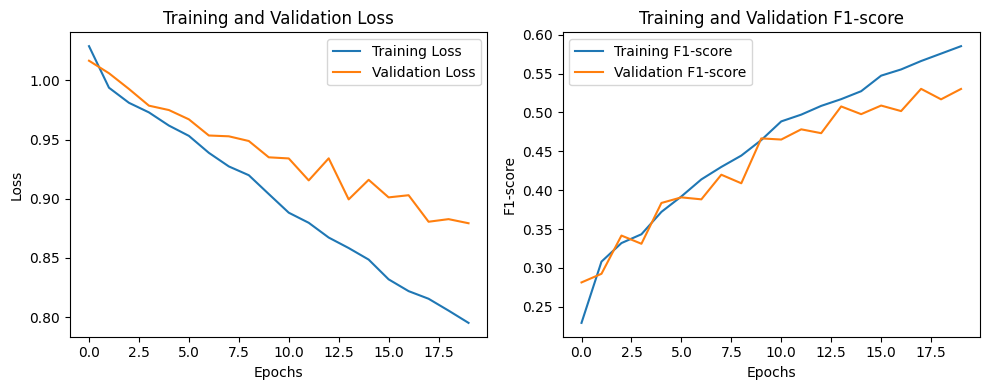

78/78 [==============================] - 0s 2ms/step


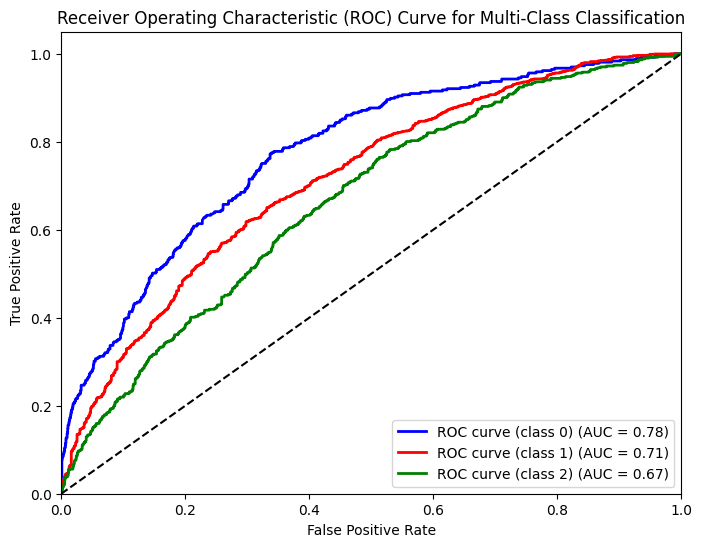

Optimal Thresholds for Each Class: [0.1]
Optimal Thresholds for Each Class: [0.1, 0.5]
Optimal Thresholds for Each Class: [0.1, 0.5, 0.5]


In [ ]:
# 1.8 Repeat the process with over sampling
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# 1.1 Shuffling the training data
train_s2 = train_new.sample(frac=1).reset_index(drop=True)

# Seperate features and labels
train_s2_features = train_s2.drop(columns=['Var_1'], axis=1)
train_s2_labels = train_s2['Var_1']

# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training set
train_s2_features_resampled, train_s2_labels_resampled = smote.fit_resample(train_s2_features, train_s2_labels)

# Splitting into training and validation sets
X_train_s2, X_val_s2, y_train_s2, y_val_s2 = train_test_split(train_s2_features_resampled, train_s2_labels_resampled, test_size=0.10, random_state=42)

# Repeat the process with over sampling
customer_segmentation_model(X_train_s2, X_val_s2, y_train_s2, y_val_s2, test_new)

Results from original training set

Test Loss: 0.8111
Test Accuracy: 0.6585
Test Precision: 0.6199
Test Recall: 0.6672
Test F1-score: 0.6672

Results from training set with over sampling

Test Loss: 0.9423
Test Accuracy: 0.4813
Test Precision: 0.6352
Test Recall: 0.5241
Test F1-score: 0.5241

The metrics were supposed to be improved, however, it was even less than earlier. The reason could be because of an error in the implementation or else because the given training set doesn't perform better with over sampling. In the over sampling, the minority class sample is replicated to match the majority class size. This doesn't represent the actual characteristics of the dataset. So this also can be a reason for reduced performance.